In [1]:
## Reinforcement learning in 1d maze
import numpy as np
import matplotlib.pyplot as plt

def tau(s,a):
    if s==0 or s==4:  return(s)
    else:      return(s+a)
def rho(s,a):
    return (s==1 and a==-1)+2*(s==3 and a == 1)
def calc_policy(Q):
    policy=np.zeros(5)
    for s in range(0,5):
        action_idx=np.argmax(Q[s,:])
        policy[s]=2*action_idx-1
        policy[0]=policy[4]=0
    return policy.astype(int)
def idx(a):
    return(int((a+1)/2))

# Discount Factor
gamma=0.5 

In [2]:
print('--> Analytic solution for optimal policy')
# Defining reward vector R
i=0; R=np.zeros(10)
for s in range(0,5):
    for a in range(-1,2,2):       
        R[i]=rho(s,a)
        i += 1
        
# Defining transition matrix
T=np.zeros([10,10]);
T[0,0]=1; T[1,1]=1; T[2,0]=1; T[3,5]=1; T[4,2]=1
T[5,7]=1; T[6,5]=1; T[7,9]=1; T[8,7]=1; T[9,9]=1

# Calculate Q-function
Q=np.linalg.inv(np.eye(10)-gamma*T) @ np.transpose(R)
Q=np.reshape(Q,[5,2]); Q[4,0]=0

policy=calc_policy(Q)
print('Q values: \n',np.transpose(Q))
print('policy: \n',np.transpose(policy))
Qana=Q

--> Analytic solution for optimal policy
Q values: 
 [[0.  1.  0.5 0.5 0. ]
 [0.  0.5 1.  2.  0. ]]
policy: 
 [ 0 -1  1  1  0]


In [5]:
print('--> Dynamic Programming')

Q=np.zeros([5,2])
for iter in range(3):
    for s in range(0,5): 
        for a in range(-1,2,2):
            act = np.int(policy[tau(s,a)])
            Q[s,idx(a)]=rho(s,a)+gamma*Q[tau(s,a),idx(act)]

print('Q values: \n',np.transpose(Q))
print('policy: \n',np.transpose(policy))

--> Dynamic Programming:
Q values: 
 [[0.  1.  0.5 0.5 0. ]
 [0.  0.5 1.  2.  0. ]]
policy: 
 [ 0 -1  1  1  0]


In [6]:
print('--> Policy iteration')

Q=np.zeros([5,2])
policy=calc_policy(Q)
for iter in range(3):
    for s in range(0,5): 
        for a in range(-1,2,2):
            act = np.int(policy[tau(s,a)])
            Q[s,idx(a)]=rho(s,a)+gamma*Q[tau(s,a),idx(act)]
    policy=calc_policy(Q)
    
print('Q values: \n',np.transpose(Q))
print('policy: \n',np.transpose(policy))

--> Policy iteration
Q values: 
 [[0.  1.  0.5 0.5 0. ]
 [0.  0.5 1.  2.  0. ]]
policy: 
 [ 0 -1  1  1  0]


In [128]:
print('--> Q-iteration')

Q_new=np.zeros([5,2])
Q=np.zeros([5,2])
for iter in range(3):
    for s in range(0,5): 
        for a in range(-1,2,2):
            maxValue = np.maximum(Q[tau(s,a),0],Q[tau(s,a),1])
            Q_new[s,idx(a)]=rho(s,a)+gamma*maxValue
    Q=np.copy(Q_new);
 
policy=calc_policy(Q)
print('Q values: \n',np.transpose(Q))
print('policy: \n',np.transpose(policy))


--> Q-iteration
Q values: 
 [[0.  1.  0.5 0.5 0. ]
 [0.  0.5 1.  2.  0. ]]
policy: 
 [ 0 -1  1  1  0]



--> SARSA
Q values: 
 [[0.  1.  0.5 0.5 0. ]
 [0.  0.5 1.  2.  0. ]]
policy: 
 [ 0 -1  1  1  0]


Text(0,0.5,'error')

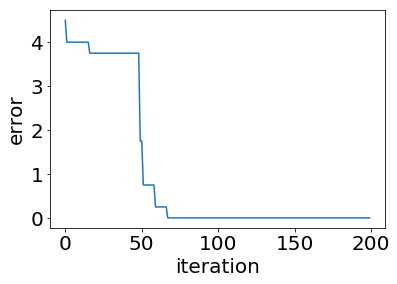

In [129]:
print('--> SARSA')

Q=np.zeros([5,2])
error = []
alpha=1;
for trial in range(200):
    policy=calc_policy(Q)
    s=2
    for t in range(0,5):
        a=policy[s]
        if np.random.rand()<0.1: a=-a #epsilon greedy
        a2=idx(policy[tau(s,a)])
        TD=rho(s,a)+gamma*Q[tau(s,a),a2]-Q[s,idx(a)]
        Q[s,idx(a)]=Q[s,idx(a)]+alpha*TD
        s=tau(s,a)
    error.append(np.sum(np.sum(np.abs(np.subtract(Q,Qana))))) 

print('Q values: \n',np.transpose(Q))
print('policy: \n',np.transpose(policy))
plt.figure(); plt.plot(error)
plt.xlabel('iteration'); plt.ylabel('error')


--> Q-Learning:
Q values: 
 [[0.  1.  0.5 0.5 0. ]
 [0.  0.5 1.  2.  0. ]]
policy: 
 [ 0 -1  1  1  0]


Text(0,0.5,'error')

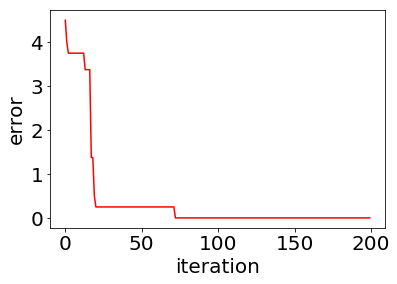

In [130]:
print('--> Q-Learning:')

Q=np.zeros([5,2])
alpha=1
error = []
for trial in range(200):
    policy=calc_policy(Q)
    s=2
    for t in range(0,5):
        a=policy[s]
        if np.random.rand()<0.2: a=-a #epsilon greedy
        TD=rho(s,a)+gamma*np.maximum(Q[tau(s,a),0],Q[tau(s,a),1])-Q[s,idx(a)]
        Q[s,idx(a)]=Q[s,idx(a)]+alpha*TD
        Q[0]=0;Q[4]=0;  
        s=tau(s,a)
    error.append(np.sum(np.sum(np.abs(np.subtract(Q,Qana))))) 

print('Q values: \n',np.transpose(Q))
print('policy: \n',np.transpose(policy))
plt.plot(error,'r'); 
plt.xlabel('iteration'); plt.ylabel('error')


--> TD(lambda) for Q-learning:
Q values: 
 [[0.         0.99999999 0.49999994 0.49998045 0.        ]
 [0.         0.25       1.         2.         0.        ]]
policy: 
 [ 0 -1  1  1  0]


Text(0,0.5,'error')

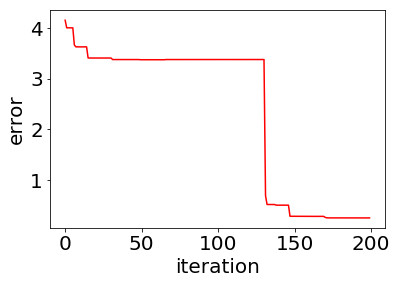

In [132]:
print('--> TD(lambda) for Q-learning')

Q=np.zeros([5,2])
alpha=1
error = []
eligibility=np.zeros([5,2])
lam=0.7

for trial in range(200):
    policy=calc_policy(Q)
    s=2
    for t in range(0,5):
        a=policy[s]
        if np.random.rand()<0.1: a=-a #epsilon greedy
        TD=rho(s,a)+gamma*np.maximum(Q[tau(s,a),0],Q[tau(s,a),1])-Q[s,idx(a)]
        eligibility*=gamma*lam
        eligibility[s,idx(a)]=1
        for si in range(1,4):
            for ai in range(2): 
                Q[si,ai]=Q[si,ai]+alpha*TD*eligibility[si,ai]
        Q[0]=0;Q[4]=0;  
        s=tau(s,a)
    error.append(np.sum(np.sum(np.abs(np.subtract(Q,Qana))))) 

print('Q values: \n',np.transpose(Q))
print('policy: \n',np.transpose(policy))
plt.plot(error,'r'); 
plt.xlabel('iteration'); plt.ylabel('error')